# ДОМАШНЕЕ ЗАДАНИЕ 2. Выбор модели

## Цель работы

- реализация собственных классов совместимых с библиотекой `sklearn`
- использование полиномиальной транcформации в моделях регрессии и классификации
- использование регуляризации в моделях регрессии и классификации
- выбор гиперпараметров и интерпретация кривых обучения

## Вариант 

Чтобы узнать свой вариант, введите Вашу фамилию в соответствующее поле ниже и запустите ячейку:

In [1]:
surname = "Гейне"  # Ваша фамилия

alph = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [4, 42, 21, 21, 34,  1, 44, 26, 18, 43, 38, 26, 18, 43,  3, 49, 45,
        7, 42, 25,  4,  9, 36, 33, 31, 29,  5, 31,  4, 19, 24, 27, 33]
d = dict(zip(alph, w))
variant =  sum([d[el] for el in surname.lower()]) % 2 + 1
print("Ваш вариант - ", variant)

Ваш вариант -  1


## Задание 1. Реализация собственных классов и функций

Набор данных: `Reg_A5.csv`

⚠️ **Замечание.** 1) Нельзя пользоваться готовыми реализациями `sklearn`; 2) чтобы избежать случая с вырожденной матрицей при оценке параметров добавьте небольшую регуляризацию по умолчанию или используйте `lstsq` из пакета `numpy` или др. способ; 3) используйте `random_state=0`

1. Реализуйте класс, предназначенный для оценки параметров линейной регрессии с регуляризацией совместимый с `sklearn`. Передаваемые параметры: 1) коэффициент регуляризации (`alpha`). Использовать метод наименьших квадратов с регуляризацией.

2. Реализуйте класс для стандартизации признаков в виде трансформации совместимый с `sklearn`. Передаваемые параметры: 1) `has_bias` (содержит ли  матрица вектор единиц), 2) `apply_mean` (производить ли центровку)

3. Использую класс `Pipeline`, выполнить обучение линейной регрессии для всего набора данных с коэффициентом регуляризации равным `0.01`. Выведите значения параметров обученной модели. Отобразите исходные данные и график функции предсказания. 

4. Реализуйте функции для расчета `MSE` и `R^2` при отложенной выборке (`run_holdout`) и кросс-валидации (`run_cross_val`). Для кросс-валидации используйте **только** класс `KFold`. Выходными значениями должны быть `MSE` и `R^2` для обучающей и тестовой частей.

    *Шаблон кода:*

    ```python
    def run_holdout(model, X, y, train_size, random_state) -> dict:
        ...
        return scores


    def run_cross_val(model, X, y, n_splits, shuffle, random_state) -> dict:
        ...
        return scores
    ```

5. Выведите значения `MSE` и `R^2`, полученные посредством функций `run_holdout` и `run_cross_val`. Использовать следующие параметры:
    - `train_size=0.75`, 
    - `n_splits=4`, 
    - `shuffle=True`, 
    - `random_state=0`

## Задание 2. Регрессия и кросс-валидация

Набор данных: `Reg_A5.csv`

⚠️ **Замечание**:
- Используйте ранее реализованные классы и функции
- Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, `random_state=0`
- Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией
- Параметры разбиения для выбора гиперпараметров используйте те, что в п.4 задания 1

Дано множество наблюдений (см. набор данных к заданию), модель - линейная регрессия (без регуляризации, с нормализацией). Найти степень полинома с минимальной ошибкой на проверочном подмножестве, определить среднеквадратическую ошибку на тестовом подмножестве (степень полинома от 1 до 25).  Сделать заключение о влиянии степени полинома регуляризации.

Построить:
- диаграмму разброса исходных данных
- график зависимости среднеквадратической ошибки (`MSE`) от степени полинома для обучающего и проверочного подмножеств
- график зависимости коэффициента детерминации (`R^2`) от степени полинома для обучающего и проверочного подмножеств
- функцию регрессии (наилучший случай) + исходные данные


## Задание 3. Классификация и кросс-валидация

Набор данных:
- `Cl_A5_V1.csv`


⚠️ **Замечание**:
- Используйте класс логистической регрессии из `sklearn` со следующими параметрами:
    - `penalty='l2'`
    - `fit_intercept=True`
    - `max_iter=100`
    - `C=1e5`
    - `solver='liblinear'`
    - `random_state=12345`
- Разбейте исходные данные на обучающее и тестовое подмножества в соотношении 70 на 30, `random_state=0`
- Для выбора гиперпараметров используйте два подхода: 1) с отложенной выборкой, 2) с кросс-валидацией
- Для кросс-валидации можно использовать функцию `cross_validate` из `sklearn`
- Параметры разбиения для выбора гиперпараметров используйте те, что в п.5 задания 1

Дано множество наблюдений (см. набор данных к заданию), классификатор - логистическая регрессия. Найти степень полинома с минимальной ошибкой на проверочном подмножестве, определить долю правильных классификаций на тестовом подмножестве. Сделать заключение о влиянии степени полинома регуляризации.

Построить:
- диаграмму разброса исходных данных
- график зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств
- график зависимости доли правильных классификаций от количества итераций для обучающего и проверочного подмножеств для наилучшего случая
- результат классификации для наилучшего случая (степень полинома) для обучающего и тестового подмножеств

---

## Решение задания 1

Подключим ряд библиотек, необходимых для работы с математикой, с исходными данными и визуализации. Также импортируем из `sklearn` набор базовых классов для трансформеров и регрессоров, базовые средства валидации данных и функции проверки совместимости классов с `sklearn`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import is_regressor 

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

Загружаем исходные данные задания и разбиваем на выходные параметры и целевые значения.

In [4]:
TASK1 = './data/Reg_A5.csv'
df = pd.read_csv(TASK1)
df.head()

,X,Y
0,3.856603,9.209759
1,0.103760,10.409240
2,3.168241,7.643742
3,3.744019,8.453341
4,2.492535,9.317824


In [5]:
X = df[['X']]
X.head()

,X
0,3.856603
1,0.103760
2,3.168241
3,3.744019
4,2.492535


In [6]:
y = df["Y"]
y.head()

0     9.209759
1    10.409240
2     7.643742
3     8.453341
4     9.317824
Name: Y, dtype: float64

Реализуем собственный класс линейной регрессии с регуляризацией. Для оценки параметров воспользуемся формулой $\omega = (X^T X + \alpha A)^{-1} X^T y$, где $A$ - это единичная матрица размера $(p+1) * (p+1)$ с $A(0,0) = 0$ ($p$ - количество признаков в таблице). Будем считать, что во входной таблице признаков отсутствует вектор единиц для организации смещения, поэтому он будет добавляться ко всем входным данным.

In [7]:
class CustomLinearRegression(BaseEstimator, RegressorMixin):
  def __init__(self, alpha=0.000001):
    self.alpha = alpha

  def fit(self, X, y):
    X, y = check_X_y(X, y)
    n_samples, n_features = X.shape
    self.n_features_in_ = n_features
    X = np.hstack((np.ones((n_samples, 1)), X))

    A = np.ones((n_features + 1, n_features + 1))
    A[0, 0] = 0  # Не применять регуляризацию к вектору 1
    self.coef_ = np.linalg.inv(X.T @ X + self.alpha * A) @ X.T @ y
    return self  
  
  def predict(self, X):
    check_is_fitted(self, 'coef_')
    X = check_array(X)
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ self.coef_
  
print(f"Is CustomLinearRegresssion class compatible with sklearn: {check_estimator(CustomLinearRegression()) == None}")
print(f"Is CustomLinearRegresssion class a regressor: {is_regressor(CustomLinearRegression())}")


Is CustomLinearRegresssion class compatible with sklearn: True
Is CustomLinearRegresssion class a regressor: True


In [8]:
class CustomLinearRegression1(BaseEstimator, RegressorMixin):
  def __init__(self, alpha=0.000001):
    self.alpha = alpha

  def fit(self, X, y):
    X, y = check_X_y(X, y)
    n_samples, n_features = X.shape
    self.n_features_in_ = n_features
    X = np.hstack((np.ones((n_samples, 1)), X))

    A = np.eye(n_features + 1)
    A[0, 0] = 0  # Не применять регуляризацию к вектору 1
    self.coef_ = np.linalg.lstsq(X.T @ X + self.alpha * A, X.T @ y, rcond=None)[0]
    return self  
  
  def predict(self, X):
    check_is_fitted(self, 'coef_')
    X = check_array(X)
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ self.coef_
  
print(f"Is CustomLinearRegresssion class compatible with sklearn: {check_estimator(CustomLinearRegression()) == None}")
print(f"Is CustomLinearRegresssion class a regressor: {is_regressor(CustomLinearRegression())}")

Is CustomLinearRegresssion class compatible with sklearn: True
Is CustomLinearRegresssion class a regressor: True


Реализуем класс для стандартизации признаков в соответствии с заданием.

In [9]:
class CustomTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, has_bias=False, apply_mean=True):
    self.has_bias = has_bias
    self.apply_mean = apply_mean
      
  def fit(self, X, y):
    X, y = check_X_y(X, y)
    if self.apply_mean:
      self.mean_ = np.mean(X, axis=0)
    else:
      self.mean_ = np.zeros(X.shape[1])
        
    if self.has_bias:
      self.scale_ = np.std(X[:, 1:], axis=0)
    else:
      self.scale_ = np.std(X, axis=0)
    return self
          
  def transform(self, X):
    check_is_fitted(self, ['scale_', 'mean_'])
    X = check_array(X)

    if self.has_bias:
      X_scaled = (X[:, 1:] - self.mean_) / self.scale_
      return np.hstack((X[:, 0][:, np.newaxis], X_scaled))
    else:
      X_std = (X - self.mean_) / self.scale_
      return X_std

print(f"Is CustomTransformer class compatible with sklearn: {check_estimator(CustomTransformer()) == None}")

Is CustomTransformer class compatible with sklearn: True


/home/mikegeine/anaconda3/lib/python3.9/site-packages/sklearn/utils/estimator_checks.py:3608: FutureWarning: As of scikit-learn 0.23, estimators should expose a n_features_in_ attribute, unless the 'no_validation' tag is True. This attribute should be equal to the number of features passed to the fit method. An error will be raised from version 1.0 (renaming of 0.25) when calling check_estimator(). See SLEP010: https://scikit-learn-enhancement-proposals.readthedocs.io/en/latest/slep010/proposal.html
  warnings.warn(


In [10]:
class CustomTransformer1(BaseEstimator, TransformerMixin):
  def __init__(self, has_bias=False, apply_mean=True):
    self.has_bias = has_bias
    self.apply_mean = apply_mean
      
  def fit(self, X, y):
    X, y = check_X_y(X, y)
    if self.apply_mean:
      self.mean_ = np.mean(X, axis=0)
    else:
      self.mean_ = np.zeros(X.shape[1])
        
    self.scale_ = np.std(X, axis=0)
    return self
          
  def transform(self, X):
    check_is_fitted(self, ['scale_', 'mean_'])
    X = check_array(X)

    X_std = (X - self.mean_) / self.scale_

    if self.has_bias:
      X_std = np.hstack((np.ones((X_std.shape[0], 1)), X_std))
    return X_std

print(f"Is CustomTransformer class compatible with sklearn: {check_estimator(CustomTransformer()) == None}")

Is CustomTransformer class compatible with sklearn: True


/home/mikegeine/anaconda3/lib/python3.9/site-packages/sklearn/utils/estimator_checks.py:3608: FutureWarning: As of scikit-learn 0.23, estimators should expose a n_features_in_ attribute, unless the 'no_validation' tag is True. This attribute should be equal to the number of features passed to the fit method. An error will be raised from version 1.0 (renaming of 0.25) when calling check_estimator(). See SLEP010: https://scikit-learn-enhancement-proposals.readthedocs.io/en/latest/slep010/proposal.html
  warnings.warn(


Организуем модель, объединяющую в себе созданные классы преобразования и регрессии, с помощью класса `Pipeline` из `sklearn`.

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
pipeline = Pipeline([
    ("standartization", CustomTransformer1()),
    ("regression", CustomLinearRegression1(alpha=0.01))
])

Полученная модель была обучена на всех доступных исходных данных. Её коэффициенты приведены ниже.

In [13]:
# Обучение
pipeline.fit(X, y)

# Параметры модели
print(f'w = {pipeline.named_steps["regression"].coef_}')

w = [ 9.44892102 -0.40381569]


Линия регрессии и множество исходных наблюдений приведены ниже.

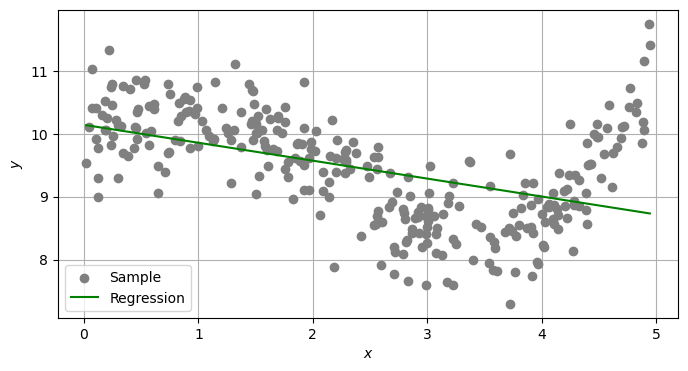

In [14]:
# Отображение наблюдений и линии регрессии
plt.figure(1, figsize=[8, 4])

xx = np.linspace(X[:].min(),X[:].max(), 2).reshape(-1,1)

pipeline.predict(xx)

plt.subplot(1,1,1)
plt.scatter(X[:], y, color="grey", label="Sample", zorder=2)
plt.plot(xx, pipeline.predict(xx), "-", color="green", label="Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)

Как видно из рисунка, линия регрессии соответствует характеру исходных данных в среднем, однако передаёт только линейную зависимость значений. Можно заметить, что регрессия не отражает рост значений на отрезке $X = [4,5]$ или падение значений на отрезке $X = [2, 4]$.

Определим функции для разбиения множеств на обучающие и тестовые; для подсчёта MSE и R^2.

In [15]:
from sklearn.utils import shuffle

def custom_split(X, y, train_size, random_state):
  # Перемешать данные
  X, y = shuffle(X, y, random_state=random_state)

  # Разбиение на train и test
  split_idx = int(train_size * len(X))
  X_train, y_train = X[:split_idx], y[:split_idx]
  X_test, y_test = X[split_idx:], y[split_idx:]
  return X_train, X_test, y_train, y_test

In [16]:
def score_mse(true, prediction):
  return sum((true - prediction)**2) / len(true)

def score_r2(true, prediction):
  return 1 - sum((prediction - true)**2) / sum((true - true.mean())**2)

Определим функцию для организации обучения и оценки с отложенной выборкой. Поступившие на вход данные разбиваются в заданной пропорции, после чего модель обучается на тренировочной части. Оценки приводятся как для проверочного множества, так и для тренировочного. 

In [17]:
def run_holdout(model, X, y, train_size, random_state=None):
  # Разбиение на train и test
  X_train, X_test, y_train, y_test = custom_split(X, y, train_size, random_state)

  # Обучение на train
  model.fit(X_train, y_train)

  # Предсказание на train
  y_train_pred = model.predict(X_train)

  # Предсказание нa test
  y_test_pred = model.predict(X_test)

  # Подсчёт MSE и R^2 на train и test
  mse_train = score_mse(y_train, y_train_pred)
  mse_test = score_mse(y_test, y_test_pred)
  r2_train = score_r2(y_train, y_train_pred)
  r2_test = score_r2(y_test, y_test_pred)

  # Подготовка оценок в виде словаря
  scores = {'mse_train': mse_train,
            'mse_test': mse_test,
            'r2_train': r2_train,
            'r2_test': r2_test}
  return scores

Определим функцию для обучения модели и её оценки с кросс-валидацией. Исходное множество разбивается на заданное количество частей, после проводится обучение и оценка для различных сочетаний полученных частей: одна из частей выбирается проверочной, остальные - тренировочными. Полученные множества оценок усредняются и возвращаются в качестве результата кросс-валидации.

In [18]:
from sklearn.model_selection import KFold

def run_cross_val(model, X, y, n_splits, shuffle, random_state=None):
  kf = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
  # Массивы для хранения оценок каждого split
  mse_train_scores = []
  mse_test_scores = []
  r2_train_scores = []
  r2_test_scores = []

  # Разбиваем данные
  splits = kf.split(X,y)
  
  for train_index, test_index in splits:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    # Предсказания на train и test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Подсчёт MSE и R^2 на train и test
    mse_train = score_mse(y_train, y_train_pred)
    mse_test = score_mse(y_test, y_test_pred)
    r2_train = score_r2(y_train, y_train_pred)
    r2_test = score_r2(y_test, y_test_pred)
    
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
    
    scores = {'mse_train': np.mean(mse_train_scores),
              'mse_test': np.mean(mse_test_scores),
              'r2_train': np.mean(r2_train_scores),
              'r2_test': np.mean(r2_test_scores)}
    return scores

Проведём оценки модели с помошью отложенной выборки и кросс-валидации. 

In [19]:
run_holdout(pipeline, X, y, train_size=0.75,random_state=0)

{'mse_train': 0.5667276502455959,
 'mse_test': 0.5400964766687156,
 'r2_train': 0.21386160310569735,
 'r2_test': 0.25350973204169447}

In [20]:
run_cross_val(pipeline, X, y, n_splits=4, shuffle=True, random_state=0)

{'mse_train': 0.5246791772578843,
 'mse_test': 0.667695717164243,
 'r2_train': 0.2631672553791137,
 'r2_test': 0.10951015167417566}

Можно заметить, что оценки при разных подходах различаются, однако в обоих случаях являются достаточно неудовлетворительными. Это свидетельствует о том, что модель необходимо менять для достижения более точных результатов. 

### Выводы

Реализованы классы линейной регрессии и стандартизации, совместимые с `sklearn`. Реализованы функции разбиения на тренировочные и проверочные множества, оценки среднеквадратической ошибки $MSE$ и коэффициента детерминации $R^2$. Описаны функции для проведения отложенной выборки и кросс-валидации. Получены оценки линейной регрессии на исходном множестве данных и сделан вывод о необходимости выбора иной модели.

## Решение задания 2

Разобьём выборку на обучающее и тестовое подмножества в соотношении 70 на 30.

In [21]:
X_train, X_test, y_train, y_test = custom_split(X, y, train_size=0.7, random_state=0)
print(f"X_train size: {len(X_train)}. X_test size: {len(X_test)}.")

X_train size: 210. X_test size: 90.


Построим диаграмму разброса исходных данных.

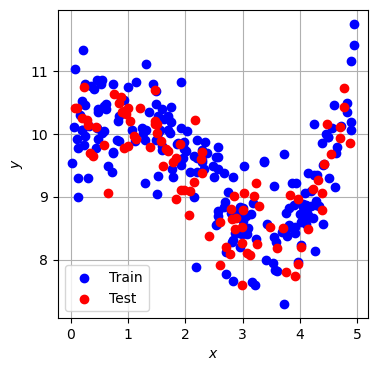

In [22]:
# Отображение наблюдений
plt.figure(2, figsize=[4, 4])

plt.subplot(1,1,1)
plt.scatter(X_train[:], y_train, color="blue", label="Train", zorder=2)
plt.scatter(X_test[:], y_test, color="red", label="Test", zorder=2)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)

Построим модель, с которой будем работать. По заданию требуется нормализация данных, она будет проведена с помошью класса стандартизации из задания 1. Затем на этих данных необходимо получать полином заданной степени. Такое преобразование возможно выполнить с помощью класса `PolynomialFeatures` пакета `sklearn`. Затем будет проводиться линейная регрессия реализованным ранее классом. По заданию регуляризация не требуется: отключаем её установкой значения `alpha` в 0.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_pipe = Pipeline([
  ("normalization", CustomTransformer1()),
  ("polynoms", PolynomialFeatures(degree=None, include_bias=False)), 
  ("linear_model", CustomLinearRegression1(alpha=0))
])

Далее обучение происходит на обучающей выборке.

### Использование `run_holdout`

Рассмотрим применение отложенной выборки для поиска наилучшего значения гиперпараметра.

In [25]:
# массив для хранения оценок и построения по ним графиков
scores_holdout = []

# степени полинома
degrees = list(range(1, 25+1))

best_degree = 0
best_mse = float("inf")

for degree in degrees:
  # Установка очередной степени полинома
  poly_pipe.named_steps["polynoms"].degree = degree
  
  # Обучение и получение MSE и R^2
  score = run_holdout(poly_pipe, X_train, y_train, train_size=0.75, random_state=0)
  scores_holdout.append(score)

  # Если новые результаты лучше прежних
  if best_mse > score["mse_test"]:
    best_mse = score["mse_test"]
    best_degree = degree

# Итоговая лучшая степень полинома
print(f"Best degree: {best_degree}. Best MSE: {best_mse}.")

# Повторное обучение на всем обучающем подмножестве 
poly_pipe.named_steps["polynoms"].degree = best_degree
poly_pipe.fit(X_train, y_train)

print(f"Test MSE:{score_mse(y_test, poly_pipe.predict(X_test))}")

Best degree: 3. Best MSE: 0.20402150696568846.
Test MSE:0.2140594732336839


Построим графики MSE и R^2 для обучающего и проверочного множеств.

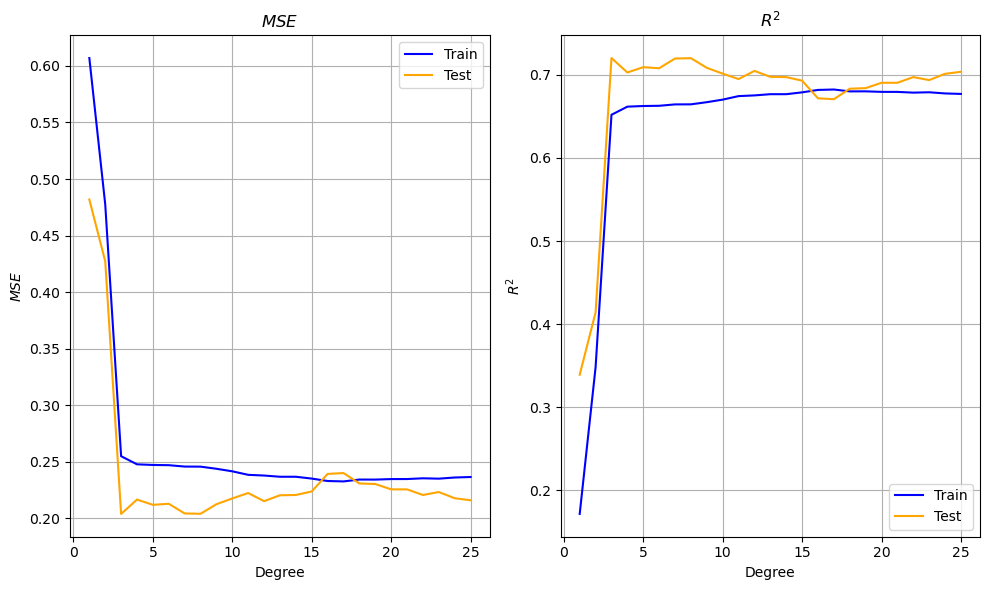

In [26]:
mse_train = list(map(lambda score: score["mse_train"], scores_holdout))
mse_test = list(map(lambda score: score["mse_test"], scores_holdout))
r2_train = list(map(lambda score: score["r2_train"], scores_holdout))
r2_test = list(map(lambda score: score["r2_test"], scores_holdout))

plt.figure(3, figsize=[10, 6])

plt.subplot(1,2,1)
plt.title("$MSE$")
plt.plot(degrees, mse_train, "-", color="blue", label="Train")
plt.plot(degrees, mse_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$MSE$")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("$R^2$")
plt.plot(degrees, r2_train, "-", color="blue", label="Train")
plt.plot(degrees, r2_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$R^2$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

На графиках показано, что при малых степенях полинома ошибка на обоих множествах достаточно высока, однако к 3 степени ошибка на тестовом множестве достигает своего минимума. При увеличении степени полинома ошибка на тренировочном множестве продолжает уменьшаться, однако она возрастает на тестовом множестве. После 20 степени ошибки на обоих множествах сильно возрастают, что говорит о слишком большой гибкости и переобучении модели.

Аналогичная картина наблюдается и с коэффициентом детерминации $R^2$: к 3 степени полинома он практически достигает своего максимума на проверочном множестве, однако далее наблюдается его падение.

Рассмотрим, как влияет степень коэффициента регуляризации на точность. Для этого зафиксируем степень полинома равной 3, но при этом проверим оценки при различных коэффициентах регуляризации.

In [27]:
# массив для хранения оценок и построения по ним графиков
scores_holdout = []

# степени регуляризации
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

best_alpha = float("inf")
best_mse = float("inf")

for alpha in alphas:
  # Установка очередной степени полинома
  poly_pipe.named_steps["linear_model"].alpha = alpha
  
  # Обучение и получение MSE и R^2
  score = run_holdout(poly_pipe, X_train, y_train, train_size=0.75, random_state=0)
  scores_holdout.append(score)

  # Если новые результаты лучше прежних
  if best_mse > score["mse_test"]:
    best_mse = score["mse_test"]
    best_alpha = alpha

# Итоговая лучшая степень регуляризации
print(f"Best alpha: {best_alpha}. Best MSE: {best_mse}.")

# Повторное обучение на всем обучающем подмножестве 
poly_pipe.named_steps["linear_model"].alpha = best_alpha
poly_pipe.fit(X_train, y_train)

print(f"Test MSE:{score_mse(y_test, poly_pipe.predict(X_test))}")

Best alpha: 1e-07. Best MSE: 0.2040215072162628.
Test MSE:0.21405947299314454


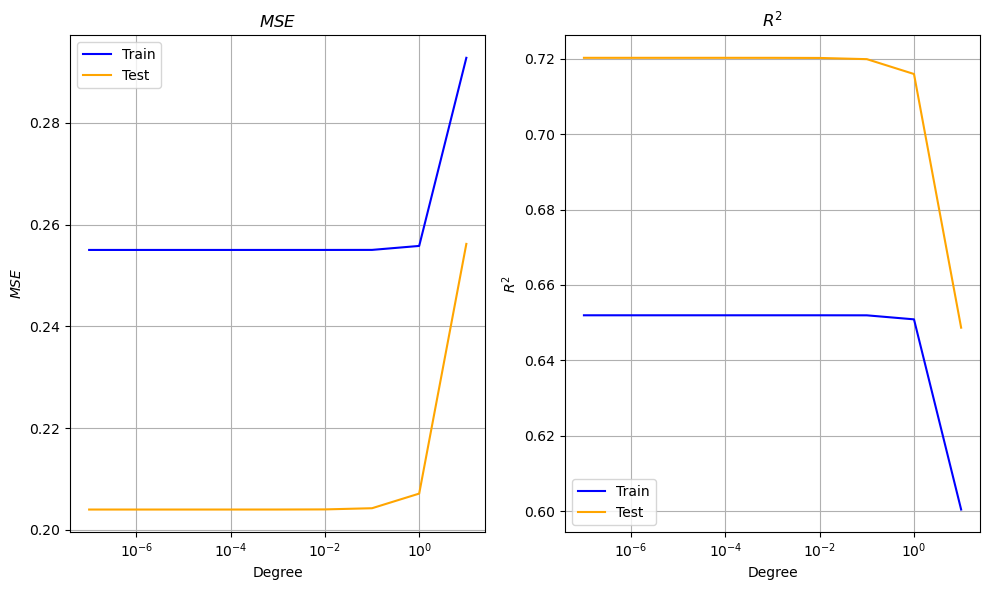

In [28]:
mse_train = list(map(lambda score: score["mse_train"], scores_holdout))
mse_test = list(map(lambda score: score["mse_test"], scores_holdout))
r2_train = list(map(lambda score: score["r2_train"], scores_holdout))
r2_test = list(map(lambda score: score["r2_test"], scores_holdout))

plt.figure(4, figsize=[10, 6])

plt.subplot(1,2,1)
plt.title("$MSE$")
plt.plot(alphas, mse_train, "-", color="blue", label="Train")
plt.plot(alphas, mse_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$MSE$")
plt.xscale("log")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("$R^2$")
plt.plot(alphas, r2_train, "-", color="blue", label="Train")
plt.plot(alphas, r2_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$R^2$")
plt.xscale("log")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Из графиков можно сделать вывод, что регуляризация с малым значением практически не влияет на величину ошибки, но с её ростом величина ошибки может начать возрастать.

Рассмотрим функцию регрессии в наилучшем случае и сравним с исходными данными.

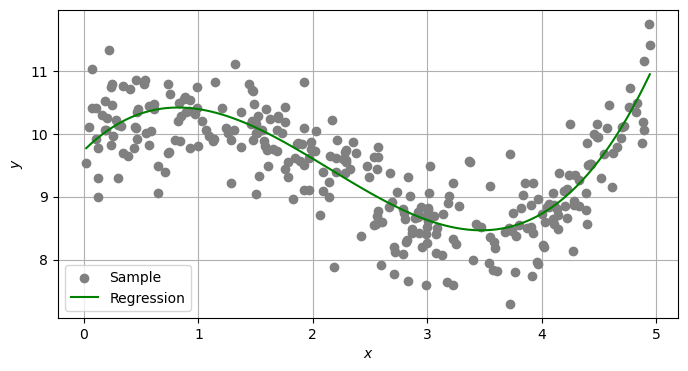

In [29]:
# Отображение наблюдений и линии регрессии
plt.figure(5, figsize=[8, 4])

xx = np.linspace(X[:].min(),X[:].max(), num=100).reshape(-1,1)

plt.subplot(1,1,1)
plt.scatter(X[:], y, color="grey", label="Sample", zorder=2)
plt.plot(xx, poly_pipe.predict(xx), "-", color="green", label="Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)

На графике показано, что функция регрессии принимает вид кривой, которая повторяет характер исходных данных.

### Использование `run_cross_val`

Повторим обучение, но уже не с отложенной выборкой, а с кросс-валидацией.

In [30]:
# массив для хранения оценок и построения по ним графиков
scores_cv = []

# степени полинома
degrees = list(range(1, 25+1))

best_degree = 0
best_mse = float("inf")

poly_pipe.named_steps["linear_model"].alpha = 0

for degree in degrees:
  # Установка очередной степени полинома
  poly_pipe.named_steps["polynoms"].degree = degree
  
  # Обучение и получение MSE и R^2
  score = run_cross_val(poly_pipe, X_train, y_train, n_splits=4, shuffle=True, random_state=0)
  scores_cv.append(score)

  # Если новые результаты лучше прежних
  if best_mse > score["mse_test"]:
    best_mse = score["mse_test"]
    best_degree = degree

# Итоговая лучшая степень полинома
print(f"Best degree: {best_degree}. Best MSE: {best_mse}.")

# Повторное обучение на всем обучающем подмножестве 
poly_pipe.named_steps["polynoms"].degree = best_degree
poly_pipe.fit(X_train, y_train)

print(f"Test MSE:{score_mse(y_test, poly_pipe.predict(X_test))}")

Best degree: 7. Best MSE: 0.21191353268244048.
Test MSE:0.21880004140128667


По результатам кросс-валидации следует выбрать полином 7 степени. Ошибка на тестовом множестве при этом немного выше, чем при использовании полинома 3 степени, но различие незначительно.

Построим графики $MSE$ и $R^2$.

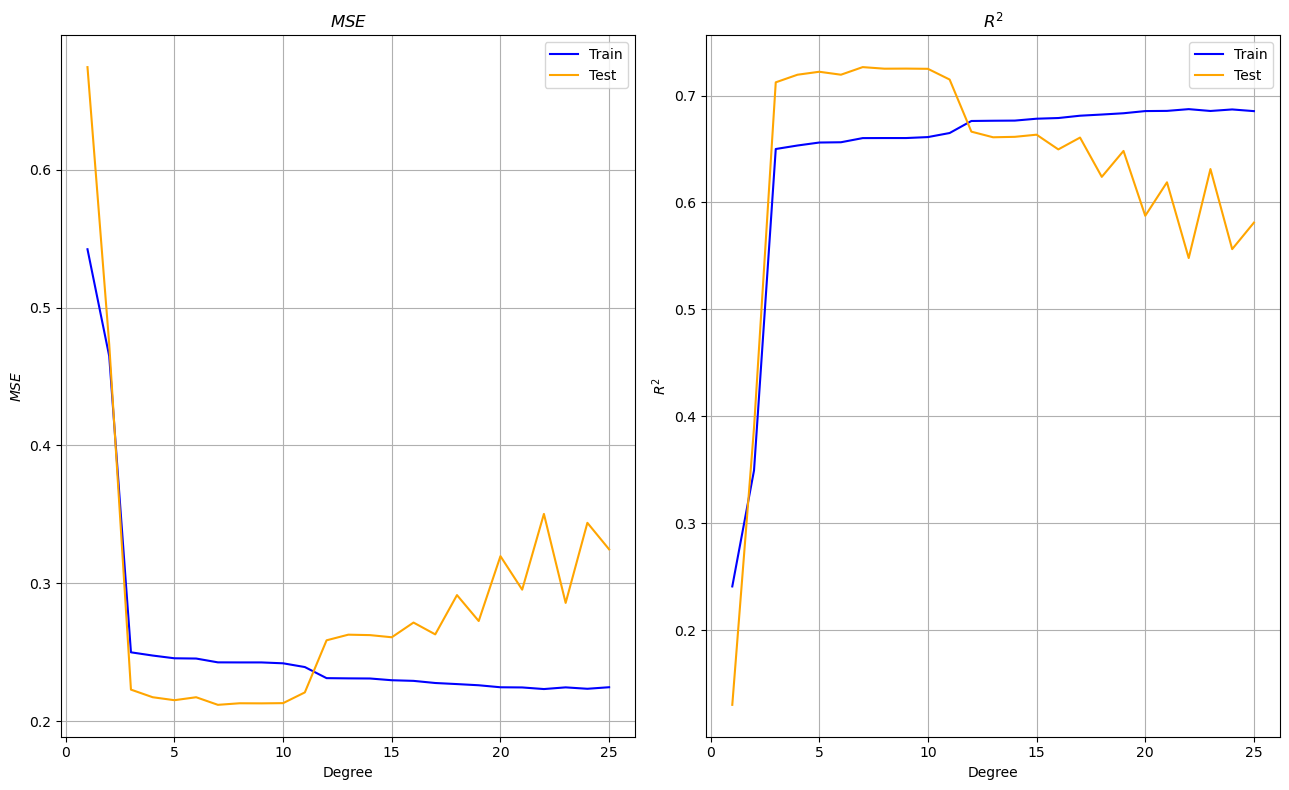

In [31]:
mse_train = list(map(lambda score: score["mse_train"], scores_cv))
mse_test = list(map(lambda score: score["mse_test"], scores_cv))
r2_train = list(map(lambda score: score["r2_train"], scores_cv))
r2_test = list(map(lambda score: score["r2_test"], scores_cv))

plt.figure(6, figsize=[13, 8])

plt.subplot(1,2,1)
plt.title("$MSE$")
plt.plot(degrees, mse_train, "-", color="blue", label="Train")
plt.plot(degrees, mse_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$MSE$")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("$R^2$")
plt.plot(degrees, r2_train, "-", color="blue", label="Train")
plt.plot(degrees, r2_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$R^2$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Поведение ошибок и коэффициента детерминации аналогично поведению при отложенной выборке. При этом на графиках видно, что ошибка на проверочном множестве достигает минимума имнно при 7 степени полинома, в отличие от графиков кросс-валидации.

Рассмотрим влияние коэффициента регуляризации.

In [32]:
# массив для хранения оценок и построения по ним графиков
scores_cv = []

# степени регуляризации
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001]

best_alpha = float("inf")
best_mse = float("inf")

for alpha in alphas:
  # Установка очередной степени полинома
  poly_pipe.named_steps["linear_model"].alpha = alpha
  
  # Обучение и получение MSE и R^2
  score = run_cross_val(poly_pipe, X_train, y_train, n_splits=4, shuffle=True, random_state=0)
  scores_cv.append(score)

  # Если новые результаты лучше прежних
  if best_mse > score["mse_test"]:
    best_mse = score["mse_test"]
    best_alpha = alpha

# Итоговая лучшая степень регуляризации
print(f"Best alpha: {best_alpha}. Best MSE: {best_mse}.")

# Повторное обучение на всем обучающем подмножестве 
poly_pipe.named_steps["linear_model"].alpha = best_alpha
poly_pipe.fit(X_train, y_train)

print(f"Test MSE:{score_mse(y_test, poly_pipe.predict(X_test))}")

Best alpha: 1e-07. Best MSE: 0.21191353363777554.
Test MSE:0.21880003546629728


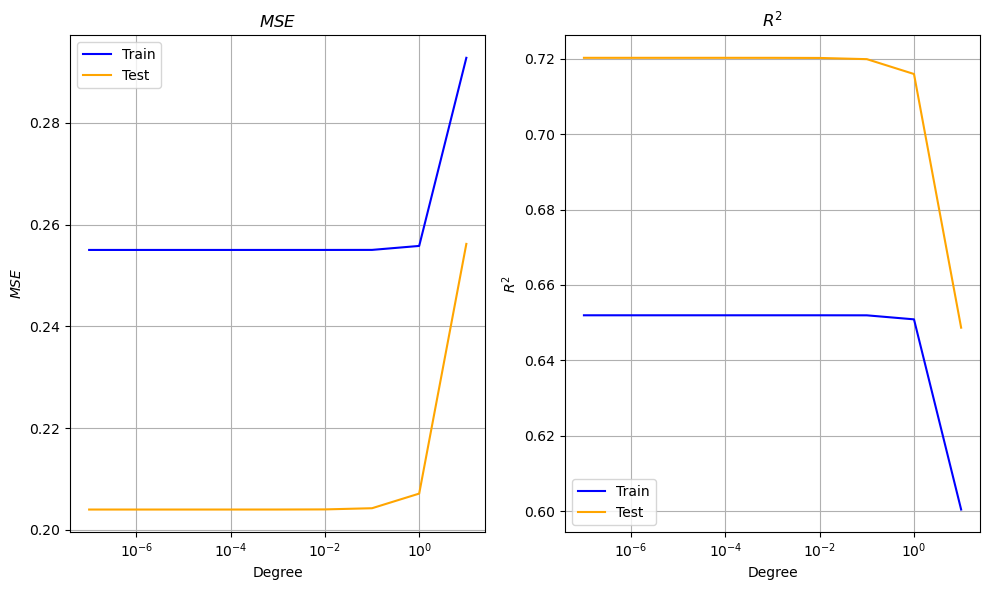

In [33]:
mse_train = list(map(lambda score: score["mse_train"], scores_holdout))
mse_test = list(map(lambda score: score["mse_test"], scores_holdout))
r2_train = list(map(lambda score: score["r2_train"], scores_holdout))
r2_test = list(map(lambda score: score["r2_test"], scores_holdout))

plt.figure(7, figsize=[10, 6])

plt.subplot(1,2,1)
plt.title("$MSE$")
plt.plot(alphas, mse_train, "-", color="blue", label="Train")
plt.plot(alphas, mse_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$MSE$")
plt.xscale("log")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("$R^2$")
plt.plot(alphas, r2_train, "-", color="blue", label="Train")
plt.plot(alphas, r2_test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("$R^2$")
plt.xscale("log")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Графики кросс-валидации отражают те же выводы, что были сделаны при отложенной выборке.


Рассмотрим функцию регрессии и сравним её с исходными данными

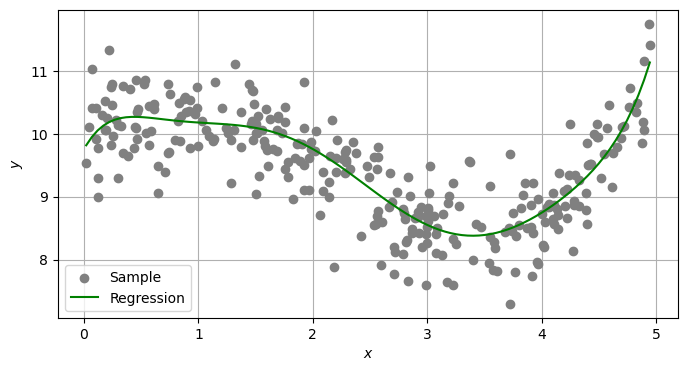

In [34]:
# Отображение наблюдений и линии регрессии
plt.figure(8, figsize=[8, 4])

xx = np.linspace(X[:].min(),X[:].max(), num=100).reshape(-1,1)

plt.subplot(1,1,1)
plt.scatter(X[:], y, color="grey", label="Sample", zorder=2)
plt.plot(xx, poly_pipe.predict(xx), "-", color="green", label="Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid(True)

На графике видно, что кривая всё ещё повторяет характер исходных данных. В целом график похож на тот, что был получен ранее при отложенной выборке, однако при $0<=X<=2$ кривая имеет немного другую форму. Возможно, такая форма даже точнее отражает характер исходных данных.

### Выводы

Использование полинома позволяет получить более гибкую функцию на том же наборе данных. В обоих случаях полученная функция намного точнее повторяет характер исходных данных.

При использовании отложенной выборки был выбран полином 3 степени. При использовании кросс-валидации - полином 7 степени. Использование 3 степени даёт чуть меньшую ошибку на тестовом множестве, чем 7 степени, однако разница не столь велика. При этом визуально полином 7 степени чуть точнее следует исходным данным.

В общем случае с увеличением степени полинома ошибки возрастают, а коэффициент детерминации снижается. Это свидетельствует о том, что модель слишком гибкая и склонна к сильному переобучению. 

Коэффициент регуляризации при больших значениях ухудшает качество модели, т.к. ошибка увеличивается. 

## Решение задания 3

Импортируем класс логистической регрессии. 

In [35]:
from sklearn.linear_model import LogisticRegression

Загрузим набор данных для варианта 1.

In [36]:
TASK3 = 'data/Cl_A5_V1.csv'

df = pd.read_csv(TASK3)
df.head()

,X1,X2,Y
0,11.145485,4.790697,0
1,3.094885,4.787600,1
2,8.577163,3.914841,0
3,9.427682,5.266742,0
4,3.514624,6.213900,1


Разделим исходные данные на входные параметры $X$ и выходные $y$.

In [37]:
X = df[['X1', 'X2']]
X.head()

,X1,X2
0,11.145485,4.790697
1,3.094885,4.787600
2,8.577163,3.914841
3,9.427682,5.266742
4,3.514624,6.213900


In [38]:
y = df["Y"]
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Y, dtype: int64

Построим модель, с которой будем работать. Как и в прошлом задании, для входных данных необходимо получать полином заданной степени, для чего будет использован класс `PolynomialFeatures` пакета `sklearn`. Затем будет проводиться логистическая регрессия классом `LogisticRegression` с заданными парматерами.

In [39]:
log_pipe = Pipeline([
    ("polynoms", PolynomialFeatures()),
    ("regression", LogisticRegression(penalty='l1', 
                                      fit_intercept=True, 
                                      max_iter=100, 
                                      C=1e5,
                                      solver='liblinear',
                                      random_state=12345
                                      ))
])

Разобьём данные в пропорции 70/30.

In [40]:
X_train, X_test, y_train, y_test = custom_split(X, y, train_size=0.7, random_state=0)
print(f"X_train size: {len(X_train)}. X_test size: {len(X_test)}.")

X_train size: 350. X_test size: 150.


Построим диаграмму разброса.

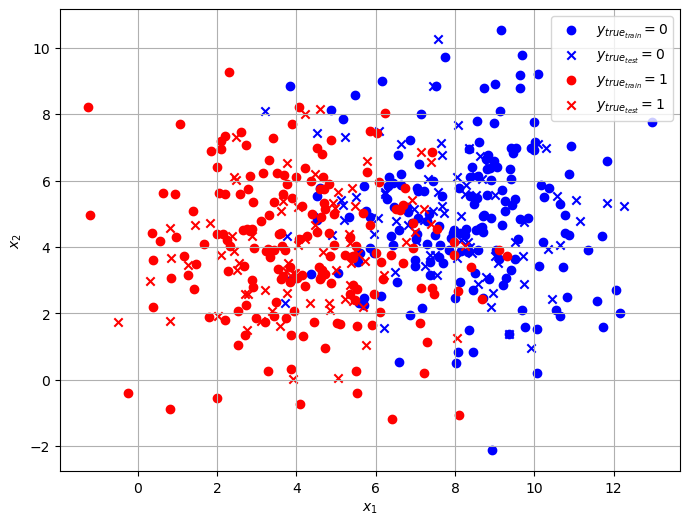

In [41]:
y_arr_train = np.asarray(y_train)
y_one_indx_train = np.argwhere(y_arr_train==1).flatten()
y_zero_indx_train =  np.argwhere(y_arr_train==0).flatten()

y_arr_test = np.asarray(y_test)
y_one_indx_test = np.argwhere(y_arr_test==1).flatten()
y_zero_indx_test =  np.argwhere(y_arr_test==0).flatten()

plt.figure(9, figsize=[8, 6])

plt.subplot(1,1,1)
plt.scatter(X_train.iloc[y_zero_indx_train]['X1'], X_train.iloc[y_zero_indx_train]['X2'], color="blue", label="$y_{true_{train}} = 0$")
plt.scatter(X_test.iloc[y_zero_indx_test]['X1'], X_test.iloc[y_zero_indx_test]['X2'], color="blue", marker="x", label="$y_{true_{test}} = 0$")
plt.scatter(X_train.iloc[y_one_indx_train]['X1'], X_train.iloc[y_one_indx_train]['X2'], color="red", label="$y_{true_{train}} = 1$")
plt.scatter(X_test.iloc[y_one_indx_test]['X1'], X_test.iloc[y_one_indx_test]['X2'], color="red", marker="x", label="$y_{true_{test}} = 1$")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.legend()
plt.show()

### Использование `run_holdout`

Рассмотрим применение отложенной выборки для поиска наилучшего значения гиперпараметра. Изменим функцию, чтобы получать новые оценки: точность модели на обучающем и проверочных множествах.

In [42]:
def run_holdout_class(model, X, y, train_size, random_state=None):
  # Разбиение на train и test
  X_train, X_test, y_train, y_test = custom_split(X, y, train_size, random_state)

  # Обучение на train
  model.fit(X_train, y_train)

  # Подготовка оценок в виде словаря
  scores = {'train': model.score(X_train, y_train),
            'test': model.score(X_test, y_test)}
  return scores

In [43]:
# массив для хранения оценок и построения по ним графиков
scores_holdout = []

# степени полинома
degrees = list(range(1, 25+1))

best_degree = 0
best_score = -float("inf")

for degree in degrees:
  # Установка очередной степени полинома
  log_pipe.named_steps["polynoms"].degree = degree
  
  # Обучение и получение точности
  score = run_holdout_class(log_pipe, X_train, y_train, train_size=0.75, random_state=0)
  scores_holdout.append(score)

  # Если новые результаты лучше прежних
  if best_score < score["test"]:
    best_score = score["test"]
    best_degree = degree

# Итоговая лучшая степень полинома
print(f"Best degree: {best_degree}. Best accuracy: {best_score}.")

# Повторное обучение на всем обучающем подмножестве 
log_pipe.named_steps["polynoms"].degree = best_degree
log_pipe.fit(X_train, y_train)

print(f"Test accuracy:{log_pipe.score(X_test, y_test)}")

Best degree: 12. Best accuracy: 0.8977272727272727.
Test accuracy:0.84


Обучение с отложенной выборкой показало, что полином 12 степени даёт наименьшую ошибку на проверочном множестве. Однако на тестовом множестве точность немного ниже.

Построим график зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств.

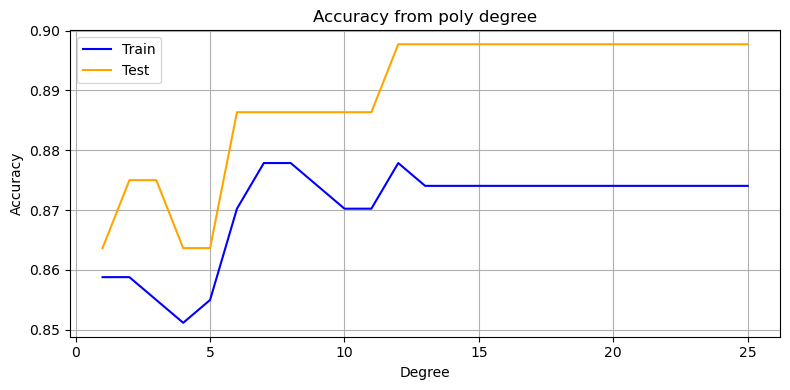

In [44]:
train = list(map(lambda score: score["train"], scores_holdout))
test = list(map(lambda score: score["test"], scores_holdout))

plt.figure(10, figsize=[8, 4])

plt.subplot(1,1,1)
plt.title("Accuracy from poly degree")
plt.plot(degrees, train, "-", color="blue", label="Train")
plt.plot(degrees, test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Как видно из графика, при увеличении степени полинома точность растёт. Однако по достижении 12 степени рост точности прекращается.

Рассмотрим зависимость точности от количества итераций. Рассмотрим 15 значений итераций в диапазоне от 10 до 150.

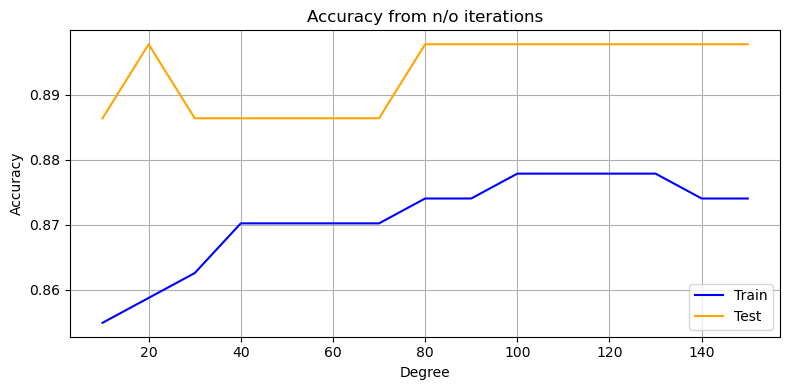

In [45]:
iterations = np.linspace(10,150, num=15)

# массив для хранения оценок и построения по ним графиков
scores_holdout_iter = []

log_pipe.named_steps["polynoms"].degree = best_degree

for iter in iterations:
  # Установка количества итераций
  log_pipe.named_steps["regression"].max_iter = iter

  # Обучение и сохранение оценок
  score = run_holdout_class(log_pipe, X_train, y_train, train_size=0.75, random_state=0)
  scores_holdout_iter.append(score)

train = list(map(lambda score: score["train"], scores_holdout_iter))
test = list(map(lambda score: score["test"], scores_holdout_iter))

plt.figure(11, figsize=[8, 4])

plt.subplot(1,1,1)
plt.title("Accuracy from n/o iterations")
plt.plot(iterations, train, "-", color="blue", label="Train")
plt.plot(iterations, test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Из графика видно, что с ростом числа итераций точность модели растёт. Однако, после 100 итераций точность в значительной степени не возрастает.

Построим результат классификации для наилучшего случая (12 степень полинома) для обучающего и тестового подмножеств.

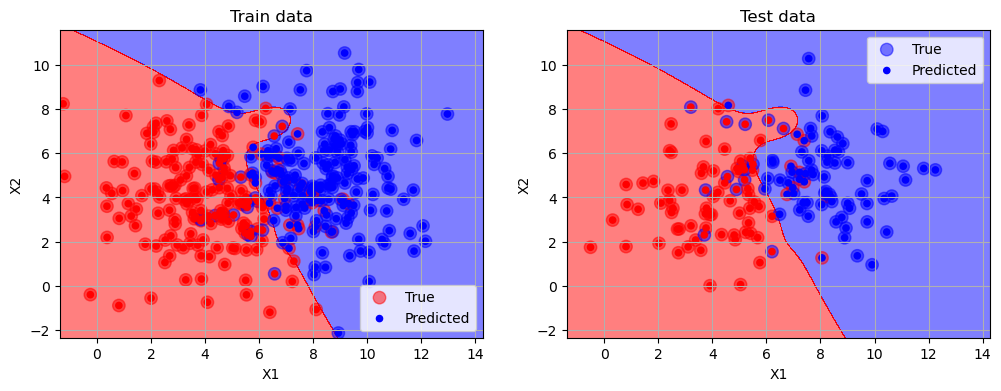

In [46]:
from matplotlib.colors import ListedColormap

# Повторное обучение на всем обучающем подмножестве с наилучшей степенью полинома 
log_pipe.named_steps["polynoms"].degree = 12
log_pipe.fit(X_train, y_train)

cmap = ListedColormap(["blue", "red"])

step = 0.01

x1_min = np.min([X_train["X1"].min(), X_test["X1"].min()])
x1_max = np.max([X_train["X1"].max(), X_test["X1"].max()])

x2_min = np.min([X_train["X2"].min(), X_test["X2"].min()])
x2_max = np.max([X_train["X2"].max(), X_test["X2"].max()])

x1_min = x1_min - (0.1*np.abs(x1_min))
x1_max = x1_max + (0.1*np.abs(x1_max))
x2_min = x2_min - (0.1*np.abs(x2_min))
x2_max = x2_max + (0.1*np.abs(x2_max))

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, step), 
                      np.arange(x2_min, x2_max, step))
points = np.c_[xx.ravel(), yy.ravel()]

Z = log_pipe.predict(points)

Z = Z.reshape(xx.shape)

plt.figure(12, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
scatter = plt.scatter(X_train[["X1"]], X_train[["X2"]], c=y_train, cmap=cmap, s=80, alpha=0.5, label="True")
plt.scatter(X_train[["X1"]], X_train[["X2"]], c=log_pipe.predict(X_train), cmap=cmap, s=20, label="Predicted")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)    
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
scatter = plt.scatter(X_test[["X1"]], X_test["X2"], c=y_test, cmap=cmap, s=80, alpha=0.5, label="True")
plt.scatter(X_test[["X1"]], X_test[["X2"]], c=log_pipe.predict(X_test), cmap=cmap, s=20, label="Predicted")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)    
plt.legend()
plt.grid(True)

plt.show()

Эти графики показывают, что основную часть данных удаётся правильно классифицировать, но существует немалое количествое ошибок.

### Использование кросс-валидации

Повторим поиск значения гипермараметра и обучение модели, но уже с использованием кросс-валидации.

In [47]:
from sklearn.model_selection import cross_validate

# массив для хранения оценок и построения по ним графиков
scores_cv = []

cv = KFold(n_splits=4, shuffle=True, random_state=0)

# степени полинома
degrees = list(range(1, 25+1))

best_degree = 0
best_score = -float("inf")

for degree in degrees:
  # Установка очередной степени полинома
  log_pipe.named_steps["polynoms"].degree = degree
  
  # Обучение и получение точности
  score = cross_validate(log_pipe, X_train, y_train, cv=cv, return_train_score=True)
  score_avg = {
    "train_score": score["train_score"].mean(), 
    "test_score": score["test_score"].mean() 
  }
  scores_cv.append(score_avg)

  # Если новые результаты лучше прежних
  if best_score < score_avg["test_score"]:
    best_score = score_avg["test_score"]
    best_degree = degree

# Итоговая лучшая степень полинома
print(f"Best degree: {best_degree}. Best accuracy: {best_score}.")

# Повторное обучение на всем обучающем подмножестве 
log_pipe.named_steps["polynoms"].degree = best_degree
log_pipe.fit(X_train, y_train)

print(f"Test accuracy:{log_pipe.score(X_test, y_test)}")

Best degree: 10. Best accuracy: 0.8599137931034483.
Test accuracy:0.84


Обучение с кросс-валидацией показало, что лучше всего подходит полином 10 степени. Точность на проверочном множестве немного выше точности на тестовом множестве, но различие не столь высоко, как при использовании полинома 12 степени.

Построим график зависимости доли правильных классификаций от степени полинома для обучающего и проверочного подмножеств.

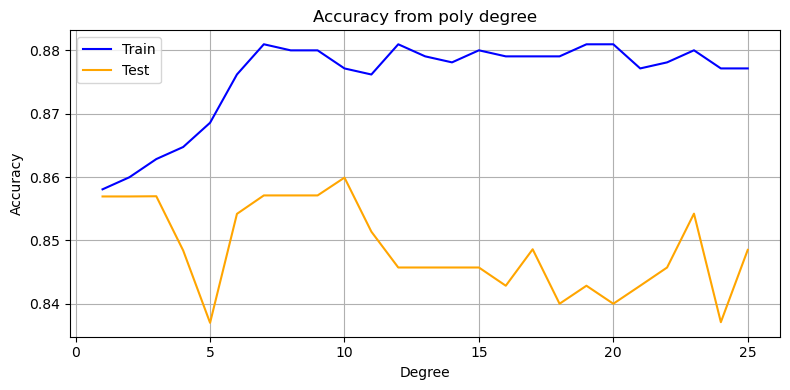

In [48]:
train = list(map(lambda score: score["train_score"], scores_cv))
test = list(map(lambda score: score["test_score"], scores_cv))

plt.figure(13, figsize=[8, 4])

plt.subplot(1,1,1)
plt.title("Accuracy from poly degree")
plt.plot(degrees, train, "-", color="blue", label="Train")
plt.plot(degrees, test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Из графика следует, что точность на тренировочном множестве выше, чем на проверочном. С увеличением степени полинома точность на обоих множествах в основном растёт, однако после 10 степени полинома точность на проверочном множестве падает, а на тренировочном остаётся практически без изменений.

Рассмотрим зависимость точности от количества итераций. Рассмотрим 15 значений итераций в диапазоне от 10 до 150.

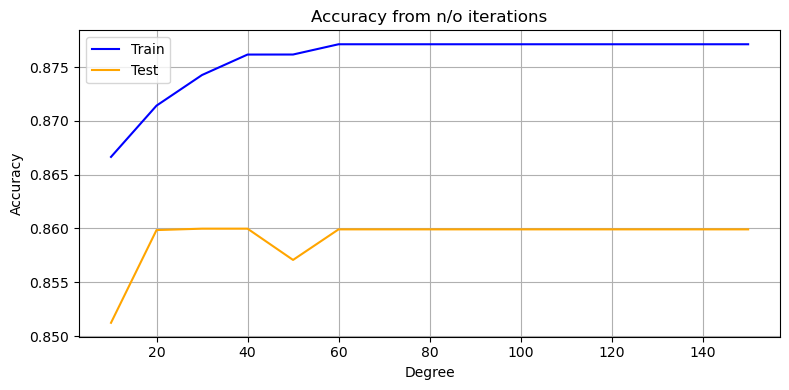

In [49]:
iterations = np.linspace(10,150, num=15)

# массив для хранения оценок и построения по ним графиков
scores_cv_iter = []

log_pipe.named_steps["polynoms"].degree = best_degree

for iter in iterations:
  # Установка количества итераций
  log_pipe.named_steps["regression"].max_iter = iter

  # Обучение и сохранение оценок
  score = cross_validate(log_pipe, X_train, y_train, cv=cv, return_train_score=True)
  score_avg = {
    "train_score": score["train_score"].mean(), 
    "test_score": score["test_score"].mean() 
  }
  scores_cv_iter.append(score_avg)

train = list(map(lambda score: score["train_score"], scores_cv_iter))
test = list(map(lambda score: score["test_score"], scores_cv_iter))

plt.figure(14, figsize=[8, 4])

plt.subplot(1,1,1)
plt.title("Accuracy from n/o iterations")
plt.plot(iterations, train, "-", color="blue", label="Train")
plt.plot(iterations, test, "-", color="orange", label="Test")
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Из графика следует, что увеличение количества итераций позволяет увеличить точность, но после 60 итераций оценки точности практически не изменяются.

Построим результат классификации для наилучшего случая (10 степень полинома) для обучающего и тестового подмножеств.

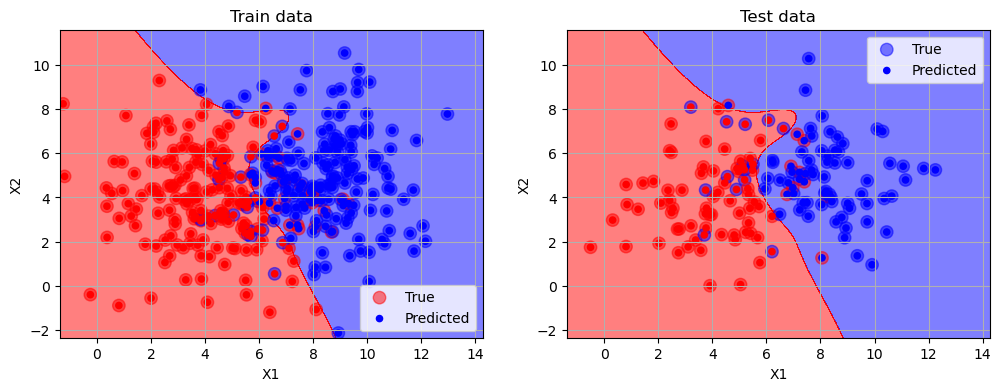

In [50]:
# Повторное обучение на всем обучающем подмножестве с наилучшей степенью полинома 
log_pipe.named_steps["polynoms"].degree = 10
log_pipe.fit(X_train, y_train)

cmap = ListedColormap(["blue", "red"])

step = 0.01

x1_min = np.min([X_train["X1"].min(), X_test["X1"].min()])
x1_max = np.max([X_train["X1"].max(), X_test["X1"].max()])

x2_min = np.min([X_train["X2"].min(), X_test["X2"].min()])
x2_max = np.max([X_train["X2"].max(), X_test["X2"].max()])

x1_min = x1_min - (0.1*np.abs(x1_min))
x1_max = x1_max + (0.1*np.abs(x1_max))
x2_min = x2_min - (0.1*np.abs(x2_min))
x2_max = x2_max + (0.1*np.abs(x2_max))

xx, yy = np.meshgrid(np.arange(x1_min, x1_max, step), 
                      np.arange(x2_min, x2_max, step))
points = np.c_[xx.ravel(), yy.ravel()]

Z = log_pipe.predict(points)

Z = Z.reshape(xx.shape)

plt.figure(15, figsize=[12, 4])

plt.subplot(1,2,1)
plt.title("Train data")
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
scatter = plt.scatter(X_train[["X1"]], X_train[["X2"]], c=y_train, cmap=cmap, s=80, alpha=0.5, label="True")
plt.scatter(X_train[["X1"]], X_train[["X2"]], c=log_pipe.predict(X_train), cmap=cmap, s=20, label="Predicted")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)    
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Test data")
plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
scatter = plt.scatter(X_test[["X1"]], X_test["X2"], c=y_test, cmap=cmap, s=80, alpha=0.5, label="True")
plt.scatter(X_test[["X1"]], X_test[["X2"]], c=log_pipe.predict(X_test), cmap=cmap, s=20, label="Predicted")
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)    
plt.legend()
plt.grid(True)

plt.show()

Граница разделения классов хоть и различается с полиномом 12 степени, но на количество ошибочных классификаций она эти отличия практически не повлияли.

### Выводы

Эксперименты показывают, что отложенная выборка и кросс-валидация дают разные решения, однако точность этих решений существенно не различается.

Оба подхода демонстрируют, что увеличение степени полинома в определённых пределах даёт прирост к точности предсказаний. Использование слишком больших степеней приводит к снижению точности на проверочных множествах, что свидетельствует о переобучении моделей.

Также рассмотрено влияние количества итераций при обучении на точность модели. Установлено, что с ростом числа итераций точность возрастает, однако при достижении некоторого порога точность перестаёт расти. 

---

## Выводы

Реализованы классы линейной регрессии и стандартизации, совместимые с sklearn. Реализованы функции для организации отложенной выборки и кросс-валидации. Проведено обучение модели линейной регрессии со стандартизацией и регуляризацией при использовании отложенной выборки и кросс-валидации. Экспериментально получено, что кросс-валидация позволяет получить оценки лучше, чем отложенная выборка.

Изучены базовые метрики линейной регрессии и логистической регрессии. Для линейной регрессии использовались среднеквадратическая ошибка $MSE$ и коэффициент детерминации $R^2$. Для логистической регрессии используется Accuracy (точность).

Изучены способы выбора гиперпараметров с использованием отложенной выборки и кросс-валидации. Установлено, что методы дают разные оценки и рекомендуют различающиеся параметры, однако существенной разницы в точности на тестовом множестве не наблюдается.